![](tec.png)


    
## Análisis de Datos Masivos
## Visualización avanzada de datos
## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Najib Alejandro Loera Rodriguez


### Objetivos

**Parte 1: Preparar los datos**
**Parte 2: Visualizar los datos**


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import sqlite3
#import folium_utils
%matplotlib inline

b) Conéctese a la base de datos

In [40]:
conn = sqlite3.connect('InternetSpeedd.db')
cur= conn.cursor()

In [41]:
query='SELECT * from average_speed'
df_sql = pd.read_sql(query, conn)
df_sql.head()

,index,Area,Average_p,Average_u,Average_d
0,0,E07000188,8.451897,21.114114,51.967713
1,1,E07000101,8.317833,20.733028,51.709226
2,2,E09000030,8.983481,22.469438,54.412001
3,3,E09000031,8.956481,22.353593,55.138017
4,4,E09000032,9.144285,22.859003,55.962499


In [42]:
df_sql.drop('index', inplace = True, axis=1)
df_sql.shape

(326, 4)

In [43]:
df_sql.head()

,Area,Average_p,Average_u,Average_d
0,E07000188,8.451897,21.114114,51.967713
1,E07000101,8.317833,20.733028,51.709226
2,E09000030,8.983481,22.469438,54.412001
3,E09000031,8.956481,22.353593,55.138017
4,E09000032,9.144285,22.859003,55.962499


In [44]:
la_json = pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [60]:
df_promedio = df_sql[['Area','Average_p']]
df_promedio = df_promedio.rename(columns={'Area':'LA_code'})
df_promedio.head()

,LA_code,Average_p
0,E07000188,8.451897
1,E07000101,8.317833
2,E09000030,8.983481
3,E09000031,8.956481
4,E09000032,9.144285


In [61]:
# Code Cell 8
print(df_promedio.Average_p.min())
print(df_promedio.Average_p.max())

0.0
11.999447541819524


In [62]:
bins = np.arange(df_promedio.Average_p.min(),df_promedio.Average_p.max(),
                 (df_promedio.Average_p.max()-df_promedio.Average_p.min())/6)
bins = list(bins)
bins

[0.0,
 1.9999079236365873,
 3.9998158472731746,
 5.999723770909762,
 7.999631694546349,
 9.999539618182936]

Generacion del mapa marca error debido a un dato mal capturado en la bd

In [63]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,la_json,'LA_code','Average_p',bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

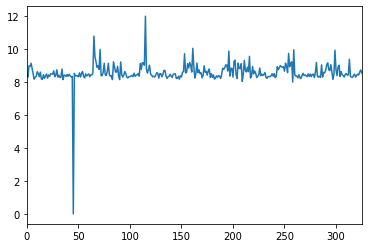

In [64]:
df_promedio.Average_p.plot()

In [65]:
df_promedio[df_promedio.Average_p==0]

,LA_code,Average_p
45,DateTime,0.0


In [66]:
df_promedio.drop(45, inplace=True)

In [67]:
df_promedio[df_promedio.Average_p==0]

,LA_code,Average_p


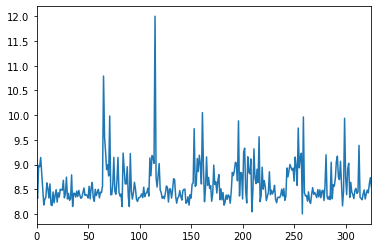

In [68]:
df_promedio.Average_p.plot()

In [69]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,la_json,'LA_code','Average_p',bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)